In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
data = pd.DataFrame(pd.read_csv('../day5/data/day5_assign_machine_failure_dataset.csv'))
data.head()

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1


In [6]:
x = data[['Temperature',	'Vibration',	'Power_Usage',	'Humidity']]
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = data['Failure_Risk']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
# scaling after splitting
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Training model 
k = 16
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import binarize
y_pred_test = model.predict(x_test)
c_matrix = confusion_matrix(y_test, y_pred_test)
print(c_matrix)

[[172   0]
 [ 75   3]]


In [18]:
err = (c_matrix[0, 1] + c_matrix[1, 0]) / y_test.count()
print('Error Rate', '{:.2f}'.format(err))
print(classification_report(y_test, y_pred_test))

Error Rate 0.30
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       172
           1       1.00      0.04      0.07        78

    accuracy                           0.70       250
   macro avg       0.85      0.52      0.45       250
weighted avg       0.79      0.70      0.59       250



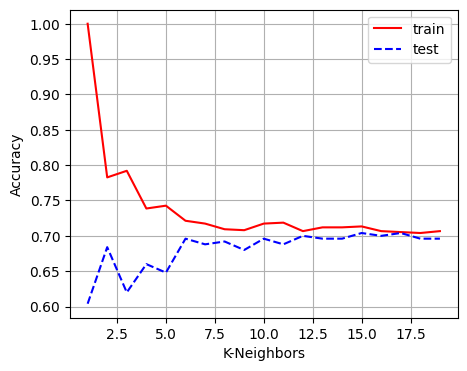

In [19]:
acc_train = []
acc_test = []
n = range(1,20)

for k in n:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    acc_train.append(model.score(x_train, y_train))
    acc_test.append(model.score(x_test, y_test))

plt.figure(figsize=(5,4))
plt.plot(n, acc_train, 'r-', label='train')
plt.plot(n, acc_test, 'b--', label='test')
plt.xlabel('K-Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='best')